<a href="https://colab.research.google.com/github/bilal3776/Analytics/blob/master/Stock_price_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Kaggle api 
!kaggle competitions download -c dogs-vs-cats

403 - Forbidden


In [ ]:
import pandas_datareader as pdr
key = 'fa52950a55c69ec6a2bbdda790bc3642f032ae00'
df = pdr.get_data_tiingo('AAPL', api_key= key)

<ipython-input-3-5ff2cb83a5f3>:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key= key)


In [ ]:
df.to_csv('APPL.csv')

In [ ]:
import pandas as pd
df= pd.read_csv('/content/APPL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-06-04 00:00:00+00:00,191.83,193.42,191.35,191.64,26266174,45.827936,46.207785,45.713265,45.782545,105064696,0.0,1.0
1,AAPL,2018-06-05 00:00:00+00:00,193.31,193.94,192.36,193.07,21565963,46.181506,46.332012,45.954552,46.124171,86263852,0.0,1.0
2,AAPL,2018-06-06 00:00:00+00:00,193.98,194.08,191.92,193.63,20933619,46.341568,46.365458,45.849437,46.257954,83734476,0.0,1.0
3,AAPL,2018-06-07 00:00:00+00:00,193.46,194.20,192.34,194.14,21347180,46.217341,46.394126,45.949775,46.379792,85388720,0.0,1.0
4,AAPL,2018-06-08 00:00:00+00:00,191.70,192.00,189.77,191.17,26656799,45.796879,45.868549,45.335805,45.670263,106627196,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2023-05-25 00:00:00+00:00,172.99,173.895,171.6900,172.410,56058258,172.99,173.895,171.6900,172.410,56058258,0.0,1.0
1254,AAPL,2023-05-26 00:00:00+00:00,175.43,175.770,173.1100,173.320,54834975,175.43,175.770,173.1100,173.320,54834975,0.0,1.0
1255,AAPL,2023-05-30 00:00:00+00:00,177.30,178.990,176.5700,176.960,55964401,177.30,178.990,176.5700,176.960,55964401,0.0,1.0
1256,AAPL,2023-05-31 00:00:00+00:00,177.25,179.350,176.7600,177.325,99313268,177.25,179.350,176.7600,177.325,99313268,0.0,1.0
1257,AAPL,2023-06-01 00:00:00+00:00,180.09,180.120,176.9306,177.700,68901809,180.09,180.120,176.9306,177.700,68901809,0.0,1.0


In [ ]:
  #will be doing the predictions on the basis of close price
  df1 =df.reset_index()['close']
  #df1[1228:]

In [ ]:
df.reset_index()['open']

0       191.640
1       193.070
2       193.630
3       194.140
4       191.170
         ...   
1253    172.410
1254    173.320
1255    176.960
1256    177.325
1257    177.700
Name: open, Length: 1258, dtype: float64

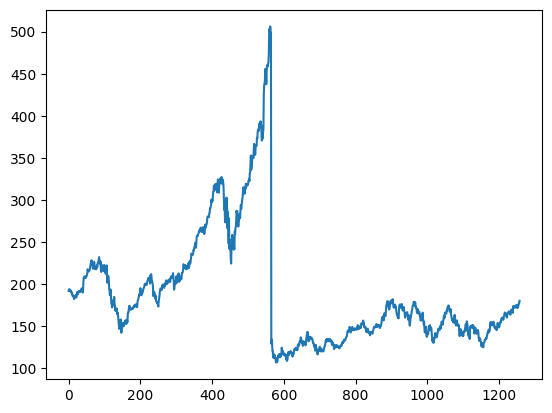

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
# LSTM are very sensitive to the scale of the data so we can apply MinMax scaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(1258, 1)

In [ ]:
from sklearn.model_selection import train_test_split
# we divide our dataset in a different manner while working on this type of daataset
# as all days data are inrelated so will divide on the basis of dates
#timeseries data --> train and test split will be the part of corresponding date


In [ ]:
train_size =int(len(df1)* 0.65)
test_size = len(df1)- train_size
train_data, test_data = df1[0:train_size, :], df1[train_size:len(df1), :1]

In [ ]:
#here I will be creating the two datasets into the dependent and the independent features
# and will create it with taking the values in the dataset of the values 
# X_train contains of 3 timesteps values and  y_train it will be the fourth value which will become our output
#same will be created in case of test data


In [ ]:
import numpy as np
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY =[], []
  for i in range(len(dataset)- time_step-1):
    a = dataset[i:(i+time_step), 0]    #i=0  0,1,2,3---
    dataX.append(a)
    dataY.append(dataset[i+ time_step, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
#reshape into X=t, t+1, t+2, t+3 and Y= t+4
import numpy as np
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train)

[[0.21287414 0.21658109 0.21825924 ... 0.28170319 0.28505949 0.29026925]
 [0.21658109 0.21825924 0.21695679 ... 0.28505949 0.29026925 0.27113338]
 [0.21825924 0.21695679 0.21254853 ... 0.29026925 0.27113338 0.28293049]
 ...
 [0.04773951 0.04851597 0.0527489  ... 0.10356919 0.10737633 0.10715091]
 [0.04851597 0.0527489  0.05891046 ... 0.10737633 0.10715091 0.10399499]
 [0.0527489  0.05891046 0.06551033 ... 0.10715091 0.10399499 0.10194114]]


In [ ]:
print(X_train.shape)
print(f'y_train{y_train.shape}')

(716, 100)
y_train(716,)


In [ ]:
#now we are going to apply LSTM
#before that we have to convert this into the three dimension as 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [ ]:
#Creation of the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 14s 458ms/step - loss: 0.0415 - val_loss: 0.0013
Epoch 2/100
12/12 [==============================] - 2s 202ms/step - loss: 0.0135 - val_loss: 0.0041
Epoch 3/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0114 - val_loss: 7.1433e-04
Epoch 4/100
12/12 [==============================] - 4s 309ms/step - loss: 0.0096 - val_loss: 5.0962e-04
Epoch 5/100
12/12 [==============================] - 3s 237ms/step - loss: 0.0082 - val_loss: 0.0018
Epoch 6/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0082 - val_loss: 3.0434e-04
Epoch 7/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0068 - val_loss: 3.5420e-04
Epoch 8/100
12/12 [==============================] - 3s 217ms/step - loss: 0.0068 - val_loss: 3.2994e-04
Epoch 9/100
12/12 [==============================] - 3s 280ms/step - loss: 0.0060 - val_loss: 9.9241e-04
Epoch 10/100
12/12 [==============================] - 2s 198ms/ste

In [ ]:
# prediction on the data and checking the performance metrics

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 1s 44ms/step


In [ ]:
#transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict =scaler.inverse_transform(test_predict)

In [ ]:
#calculate RMSE performance metrics 
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict)) 

0.03976884654445741

In [ ]:
##test data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

0.013404227383605935

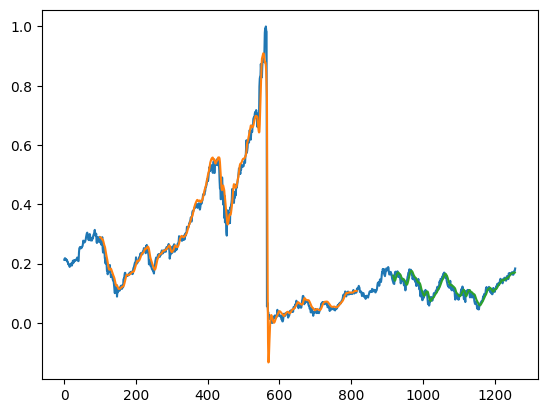

In [ ]:
#plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
#green line is the predicted curve which is the test data

In [ ]:
#now we will be predicting the future 30 days stock closing value
len(test_data)     
# so for calculating any of the future value I have to take the value of previous
# 100 days value of the timestep

441

In [ ]:
#so I am taking it 100 days back of 441 -100 =341 and calculating from there
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input= temp_input[0].tolist()
#this will 100 days value

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps =100
i=0
# will calculate for the next 30 days
while(i<30):
    if(len(temp_input)>100):
    #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    


[0.17361176]
101
1 day input [0.05983719 0.06675016 0.06654978 0.06993112 0.07288666 0.07105823
 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446 0.09297433
 0.09790858 0.09056982 0.09380088 0.09665623 0.11015654 0.11937383
 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244 0.11774577
 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555 0.10537257
 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567 0.09785848
 0.11068253 0.11769568 0.11211021 0.11529117 0.10958046 0.10434565
 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617 0.12663745
 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362
 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731
 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912
 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969
 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976
 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081
 0.16758923 0.16463369 0.16338134

In [ ]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [ ]:
len(df1)

1258

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)

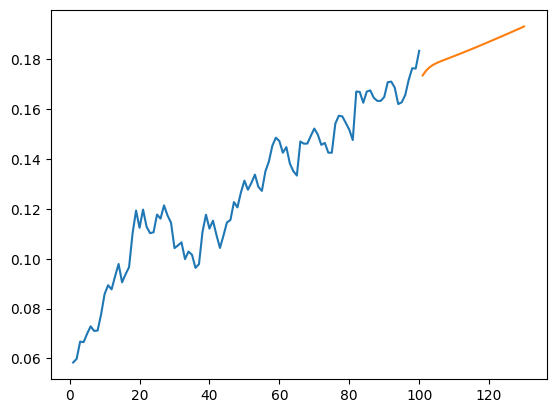

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

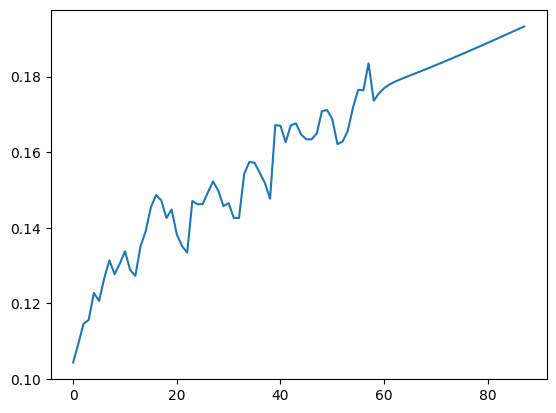

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])  